# How much cost a car?

<img src='https://i.imgur.com/QA8v36F.png' style='width:1000px;height:550px'/>

### About Dataset:

This dataset it's a popular dataset to study regression tecnics from UCI Machine Learning Repository that can be found here: http://archive.ics.uci.edu/ml/datasets/Automobile

This data set consists of three types of entities: 

(a) the specification of an auto in terms of various characteristics, 

(b) its assigned insurance risk rating, 

(c) its normalized losses in use as compared to other cars.

The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year.  This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

### Approach:

How much cost a car? Determined to answer this question let's performe the following steps to understand our data and be capable of create a regression model to evaluate cars of all makers and models.

- Loading Required Librarys
- Importing and cleaning our dataset
- Dealing with missing values
- Exploratory Analysis
- Feature Engineering
- Modeling
- Conclusion

### Loading Required Librarys

In [1]:
import matplotlib.pyplot as plt # visualization
import numpy as np
import pandas as pd
import random
import seaborn as sns # visualization
from statsmodels.graphics.gofplots import qqplot # visualization
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# just to jupyter notebook be capable of execute matplotlib
%matplotlib inline

from pandas.plotting import register_matplotlib_converters # avoid erros between pandas and matplotlib
register_matplotlib_converters()

### Importing and cleaning our dataset

In [2]:
# Importing dataset from UCI Machine Learning Repository
cars = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
                   ,delimiter=','
                   ,names = ['symboling','normalized_losses','maker'
                             ,'fuel_type','aspiration','num_of_doors'
                            ,'body_style','drive_wheels','engine_location'
                            ,'wheel_base','length','width','height'
                            ,'curb_weight','engine_type','num_of_cylinders'
                            ,'engine_size','fuel_system','bore','stroke'
                            ,'compression_ratio','horsepower','peak_rpm'
                            ,'city_mpg','highway_mpg','price'])

# Seeing the first 5 rows
cars.head()

,symboling,normalized_losses,maker,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Apparently this dataset have "?" in place of missing values, how to solve that? Let's investigate!

In [3]:
# Seeing dataset structure
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null object
maker                205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_of_doors         205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_of_cylinders     205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-nul

As we can see some continuos features are converted to strings, let's deal with that latter

In [4]:
# seeing dataset shape
cars.shape

(205, 26)

In [5]:
# Seeing columns
cars.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


The features above seems to be okay, let's verify missing values:

In [6]:
# Looking for total missing values in each column
cars.isna().sum()

symboling            0
normalized_losses    0
maker                0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

We was right, the missing values was replaced by another characters, let's solve that importing our
dataset again passing now the argument "na_values" inside pd.read_csv() with the possible characters that
are replacing missing values

When we remove this characters from our dataset the problem with continuos as strings will be solved

In [7]:
# Creating a list with the possible characters that are replacing missing values
missing_values = ['?','--','-','??','.']

# Importing dataset from UCI Machine Learning Repository
cars = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
                   ,delimiter = ','
                   ,na_values = missing_values # replacing characters by NaN
                   ,names = ['symboling','normalized_losses','maker'
                             ,'fuel_type','aspiration','num_of_doors'
                            ,'body_style','drive_wheels','engine_location'
                            ,'wheel_base','length','width','height'
                            ,'curb_weight','engine_type','num_of_cylinders'
                            ,'engine_size','fuel_system','bore','stroke'
                            ,'compression_ratio','horsepower','peak_rpm'
                            ,'city_mpg','highway_mpg','price'])

# Seeing the first 5 rows
cars.head()

,symboling,normalized_losses,maker,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [8]:
# Verifying continuos variables
cars.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Dealing with missing values

Apparently everything it's okay with missing values, let's plot a bar graph with na's percentage

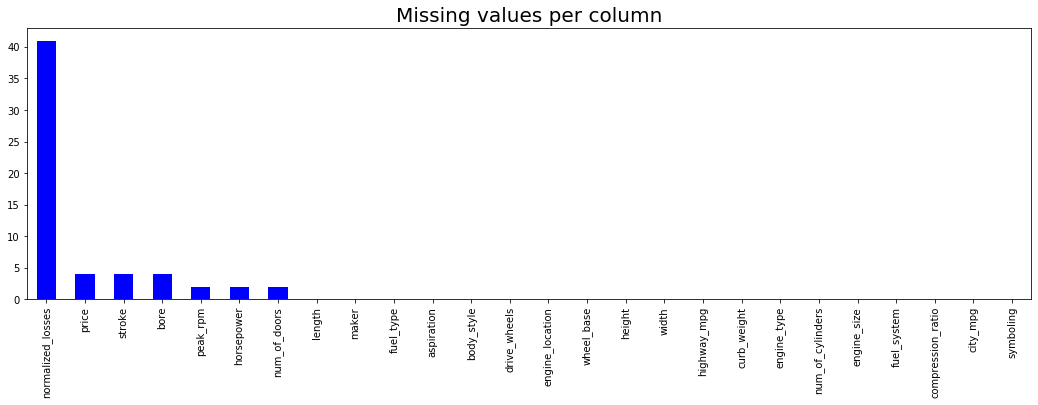

In [9]:
# Ploting missing values percentage in each dataset
plt.subplots(0,0, figsize = (18,5))
ax = (cars.isnull().sum()).sort_values(ascending = False).plot.bar(color = 'blue')
plt.title('Missing values per column', fontsize = 20);

Now we can see clearly the missing values proportion, normalized_losses have more missing values, let's deal with this feature first:

In [10]:
# Interpolating a linear regression to replace missing values in continuos variables
cars['normalized_losses'] = cars['normalized_losses'].interpolate(method = "linear"
                                      ,limit_direction = "both")

cars['price'] = cars['price'].interpolate(method = "linear"
                                      ,limit_direction = "both")

cars['stroke'] = cars['stroke'].interpolate(method = "linear"
                                      ,limit_direction = "both")

cars['bore'] = cars['bore'].interpolate(method = "linear"
                                      ,limit_direction = "both")

cars['peak_rpm'] = cars['peak_rpm'].interpolate(method = "linear"
                                      ,limit_direction = "both")

cars['horsepower'] = cars['horsepower'].interpolate(method = "linear"
                                      ,limit_direction = "both")

The feature 'num_of_doors' represent the number of doors(two, four) but are described as a string object, let's investigate more to replace missing values in this feature

In [11]:
# Counting number of missing values in num_of_doors
cars['num_of_doors'].isna().sum()

2

Only 2 missing values, let's make a simple analysis by cars make and body_style and try to infer how many doors this cars have

In [12]:
# Looking what body_style and make our missing values have
cars[['maker','body_style']][cars['num_of_doors'].isnull()==True]

,maker,body_style
27,dodge,sedan
63,mazda,sedan


As we can see we have a car that are a sedan from dodge make and we have a sedan from mazda make, let's see how many doors each of this car types have

In [13]:
# Seeing how many doors a mazda sedan have
cars['num_of_doors'][(cars['body_style']=='sedan') & (cars['maker']=='mazda')]

53    four
54    four
60    four
62    four
63     NaN
65    four
66    four
Name: num_of_doors, dtype: object

In [14]:
# Seeing how many doors a dodge sedan have
cars['num_of_doors'][(cars['body_style']=='sedan') & (cars['maker']=='dodge')]

25    four
26    four
27     NaN
Name: num_of_doors, dtype: object

As we can see this type of cars have four doors, let's replace missing values in this feature with 'four'

In [15]:
# Replacing missing values into num_of_doors
cars['num_of_doors'] = cars['num_of_doors'].fillna('four')

Now let's verify if missing values was replaced correctly

In [16]:
# Verifying missing alues
cars.isna().sum()

symboling            0
normalized_losses    0
maker                0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

### Exploratory Analysis

Now that we already cleaned our data and treated missing values, let's explore our dataset to understand and get insights from it

First of all let's take a look into our target: 'price'

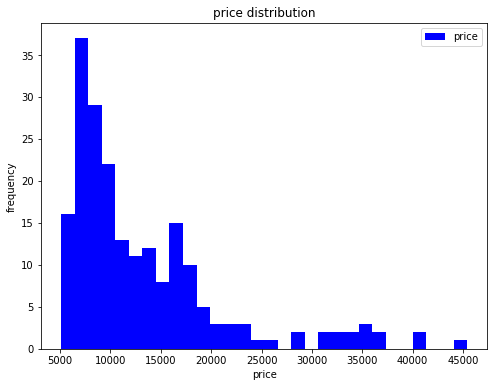

In [17]:
# Plotting a histogram of our feature price
plt.figure(figsize=(8,6)) # creating the figure
plt.hist(cars['price'] # plotting the histogram
         ,bins=30 # defyning number of bars
         ,label='price' # add legend
        ,color='blue') # defyning the color

plt.xlabel('price') # add xlabel
plt.ylabel('frequency') # add ylabel
plt.legend()
plt.title('price distribution');

Clearly our target have not a normal distribution, let's deal with that latter in feature engginering, let's take a look into all numerical distributions

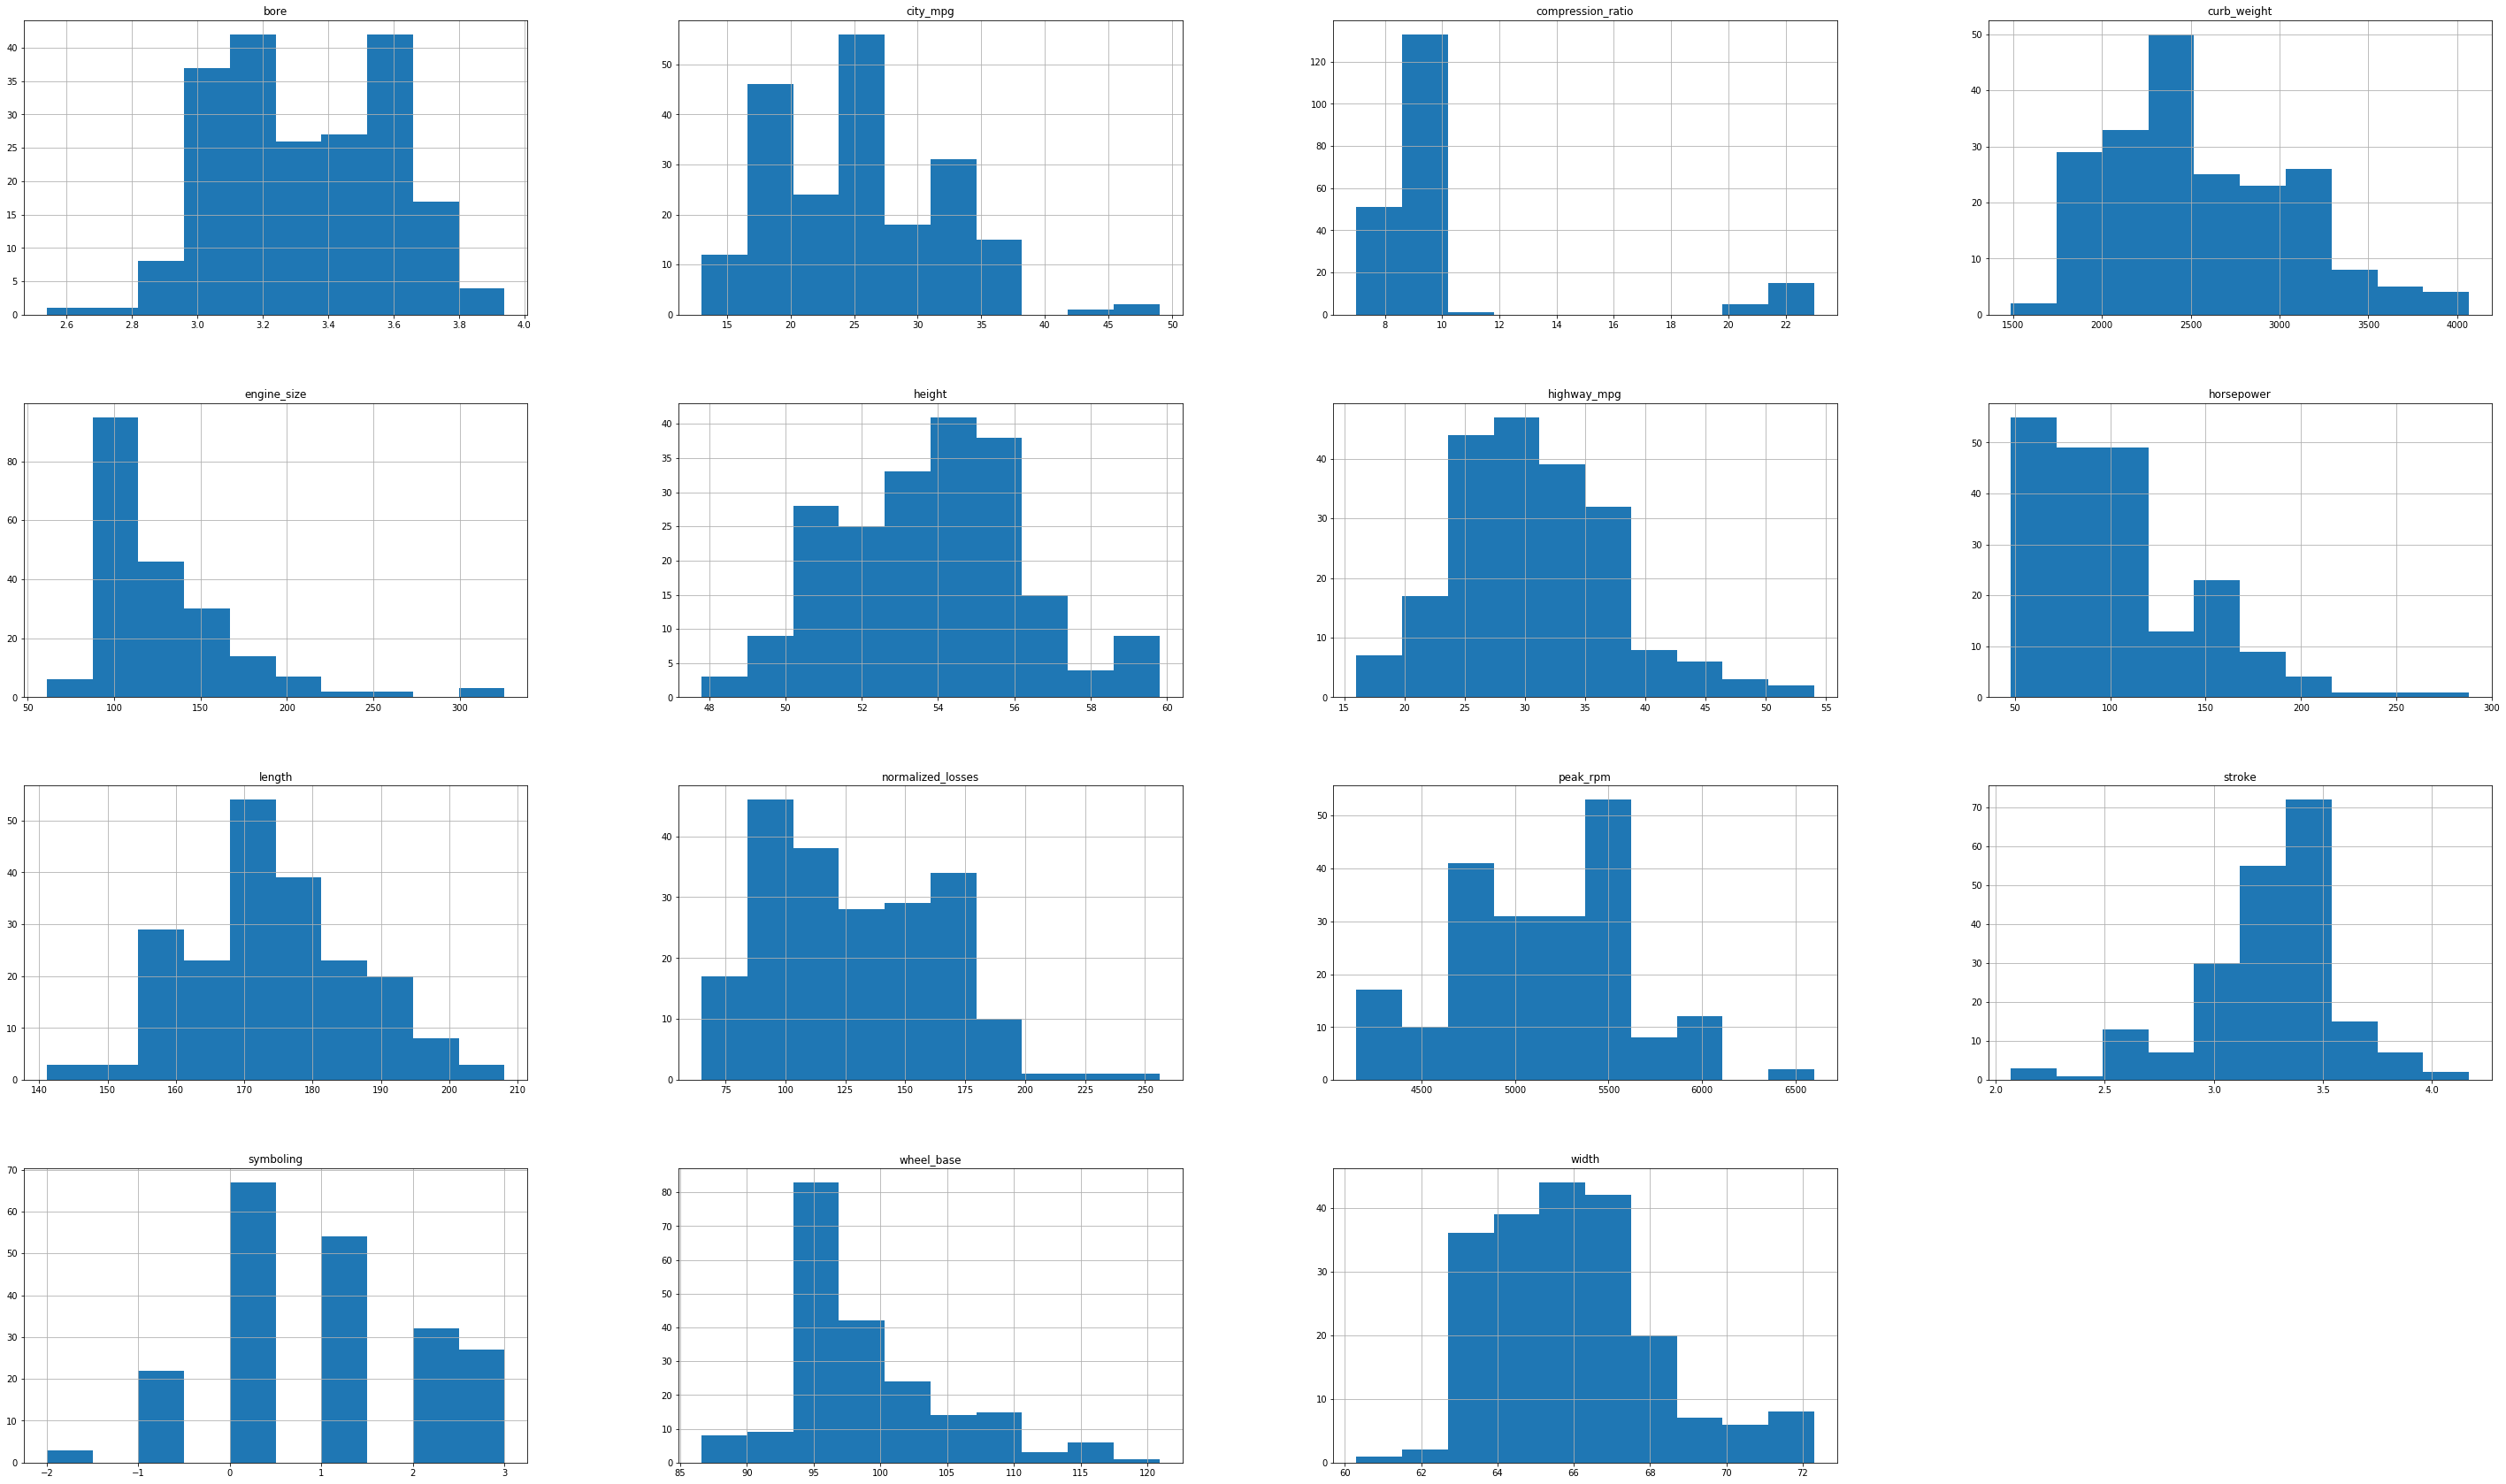

In [18]:
# Saving numerical features
num_var = ['symboling','normalized_losses','wheel_base','length'
          ,'width','height','curb_weight','engine_size','bore'
           ,'stroke','compression_ratio','horsepower','peak_rpm'
           ,'city_mpg','highway_mpg']

# plotting a histogram for each feature
cars[num_var].hist(bins=10
                   , figsize=(50,30)
                   , layout=(4,4));

None of our numerical features have a normal distribution, let's deal with that latter in feature engginering, now let's a look in each numerical feature correlation with our target and with each other

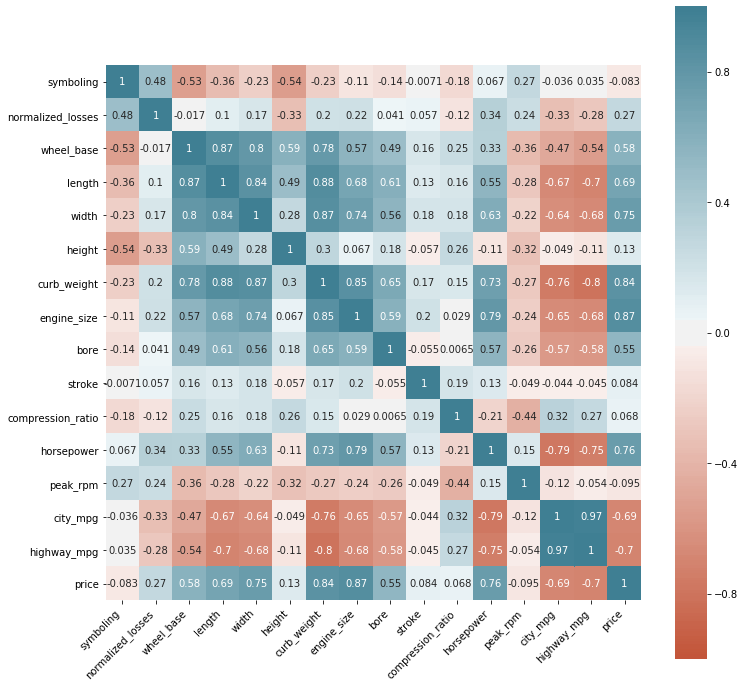

In [19]:
# Numerical variables correlation
corr = cars.corr() # creting the correlation matrix

plt.figure(figsize=(12,12)) # creating the and difyning figure size
ax = sns.heatmap( # plotting correlation matrix
    corr,vmin=-1, vmax=1, center=0,
    annot=True,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels( # adding axes values
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

engine_size, horsepower, curb_weight, length and width have a high correlation with car prices, let's make a scatter plot for each of this features to understand better this relation

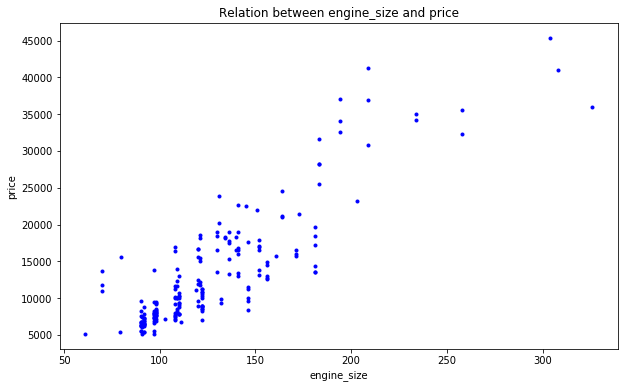

In [20]:
# Plotting a scatter plot of relation between engine_size and price
plt.figure(figsize=(10,6)) # creating the figure
plt.plot(cars['engine_size'] # plotting
         ,cars['price'],'.'
        ,color='blue')

plt.xlabel('engine_size') # add xlabel
plt.ylabel('price') # add ylabel
plt.title('Relation between engine_size and price');

A beautiful distribution, with linear relation

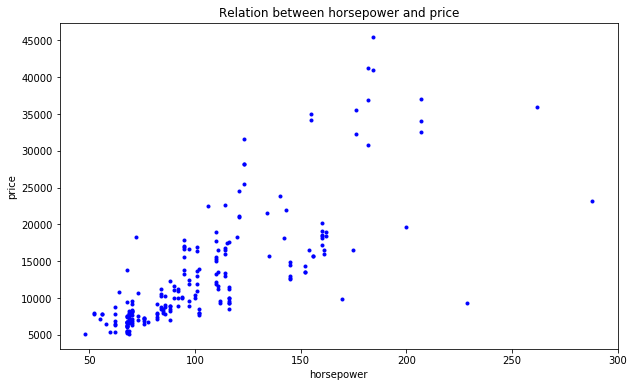

In [21]:
# Plotting a scatter plot of relation between horsepower and price
plt.figure(figsize=(10,6)) # creating the figure
plt.plot(cars['horsepower'] # plotting
         ,cars['price'],'.'
        ,color='blue')

plt.xlabel('horsepower') # add xlabel
plt.ylabel('price') # add ylabel
plt.title('Relation between horsepower and price');

A good distribution but we have also some outlayers, let's see now curb_weight vs price

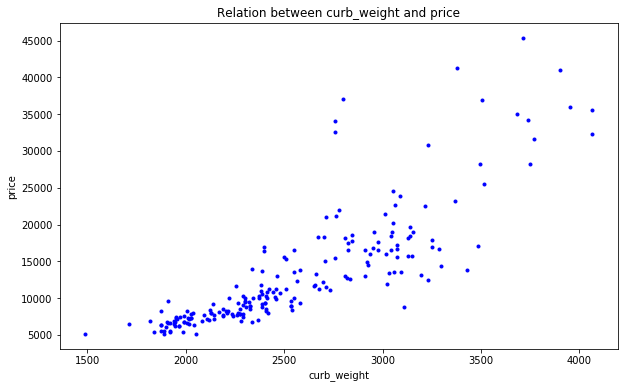

In [22]:
# Plotting a scatter plot of relation between curb_weight and price
plt.figure(figsize=(10,6)) # creating the figure
plt.plot(cars['curb_weight'] # plotting
         ,cars['price'],'.'
        ,color='blue')

plt.xlabel('curb_weight')
plt.ylabel('price')
plt.title('Relation between curb_weight and price');

Let's take a look into length feature vs prices

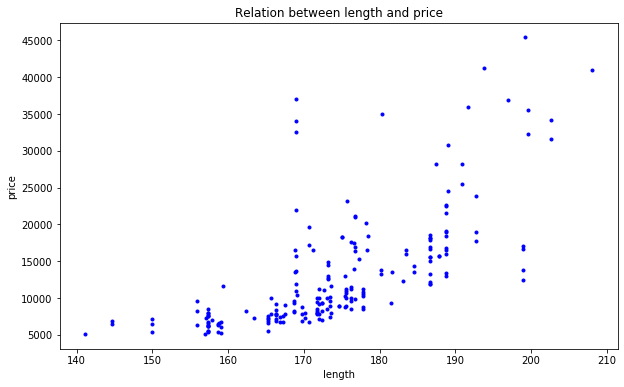

In [23]:
# Plotting a scatter plot of relation between length and price
plt.figure(figsize=(10,6)) # creating the figure
plt.plot(cars['length'] # plotting
         ,cars['price'],'.'
        ,color='blue')

plt.xlabel('length')
plt.ylabel('price')
plt.title('Relation between length and price');

Very similar with all another high correlated features, i'll need to remove some of this features latter do avoid overfitting  in our model

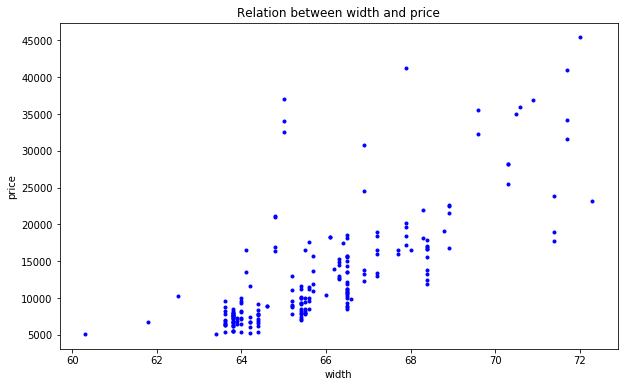

In [24]:
# Plotting a scatter plot of relation between width and price
plt.figure(figsize=(10,6)) # creating the figure
plt.plot(cars['width'] # plotting
         ,cars['price'],'.'
        ,color='blue')

plt.xlabel('width')
plt.ylabel('price')
plt.title('Relation between width and price');

Not soo linear, latter in feature engginering i'll deal with unnormal distribution of target to solve some problems

###### Let's make a bivariate a analysis of each categorical feature with our target to understand better this features

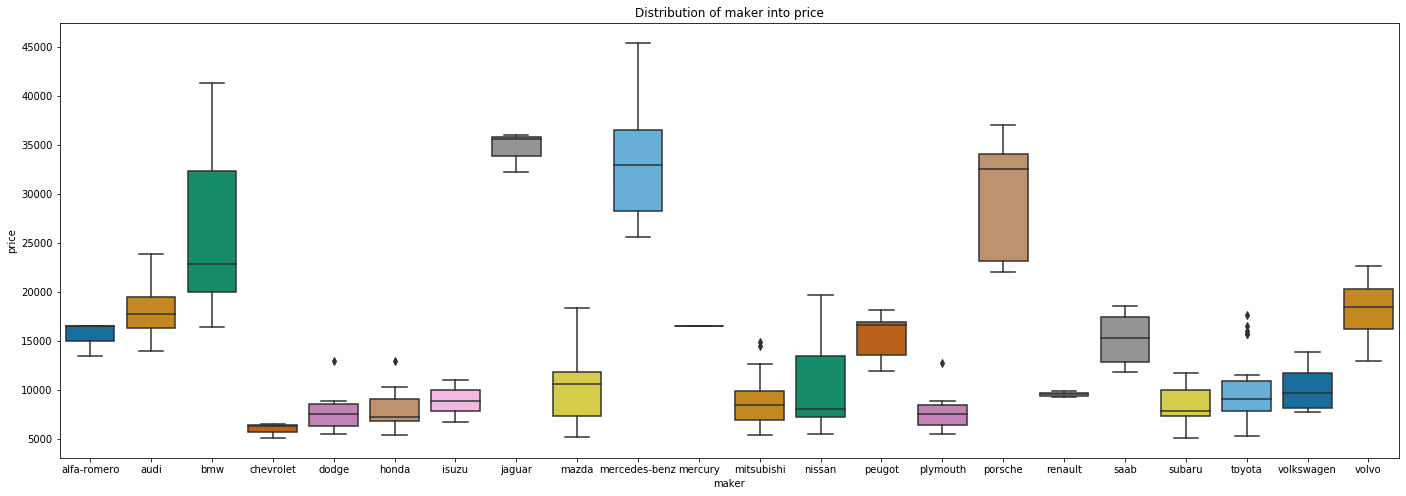

In [25]:
# Plotting Distribution of maker into price
plt.figure(figsize=(24,8))
sns.boxplot(x='maker',y='price',data=cars, 
                 palette="colorblind")
plt.title('Distribution of maker into price');

Clearly the makers mercedes-benz, porsche, jaguar and bmw have the high prices, with this information we can create a new feature with this makers

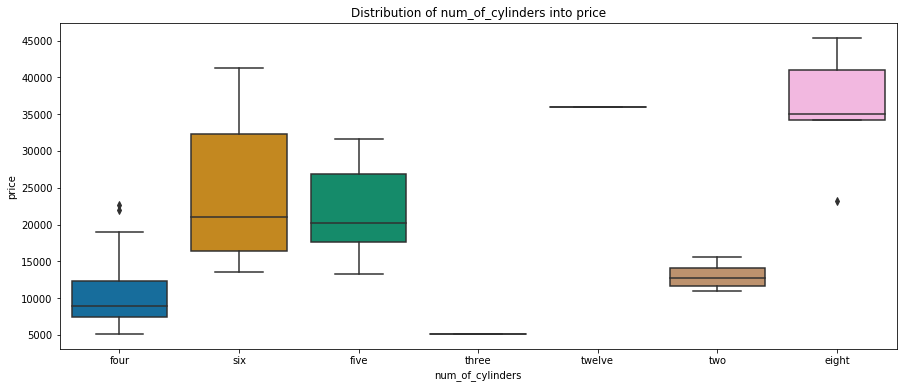

In [26]:
# Plotting Distribution of num_of_cylinders into price
plt.figure(figsize=(15,6))
sns.boxplot(x='num_of_cylinders',y='price',data=cars, 
                 palette="colorblind")
plt.title('Distribution of num_of_cylinders into price');

We will convert this feature to continuos latter but we already can see that much more cylinders, more high prices, cars with eight and twelve cylinders shows that in boxplot

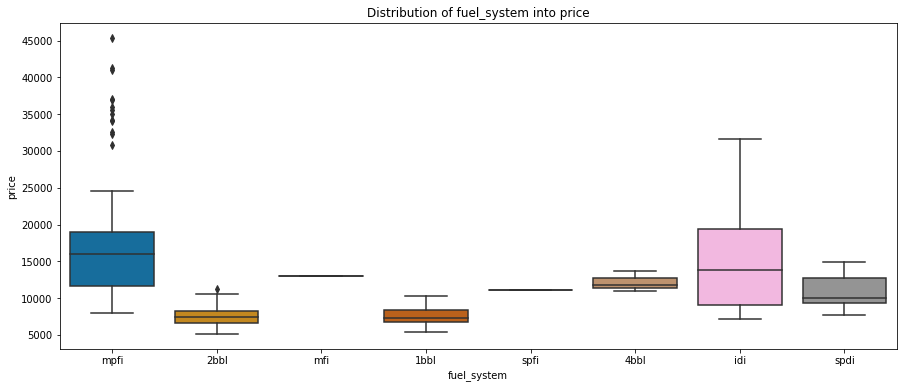

In [27]:
# Plotting Distribution of fuel_system into price
plt.figure(figsize=(15,6))
sns.boxplot(x='fuel_system',y='price',data=cars, 
                 palette="colorblind")
plt.title('Distribution of fuel_system into price');

Here we can see that some outlayers cars with mpfi fuel system have high prices but all other fuel system types are all custing less then 25000

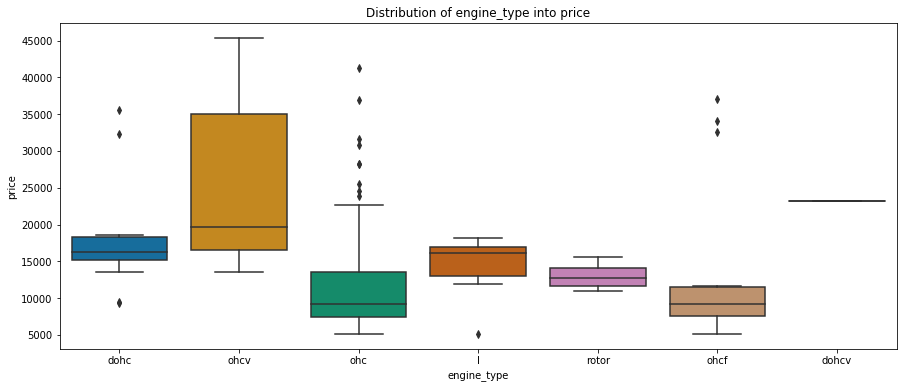

In [28]:
# Plotting Distribution of engine_type into price
plt.figure(figsize=(15,6))
sns.boxplot(x='engine_type',y='price',data=cars, 
                 palette="colorblind")
plt.title('Distribution of engine_type into price');

Here if we exclude the outlayers we can clarly see that cars with more high prices have ohcv or dohcv engines

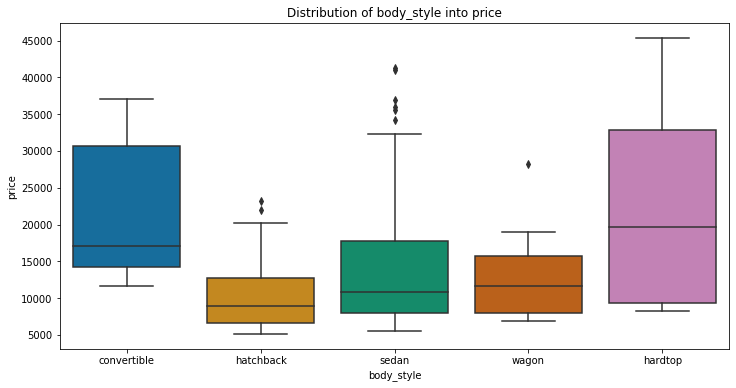

In [29]:
# Plotting Distribution of body_style into price
plt.figure(figsize=(12,6))
sns.boxplot(x='body_style',y='price',data=cars, 
                 palette="colorblind")
plt.title('Distribution of body_style into price');

Clearly we have more sheep cars that are hatchback, sedan or wagon, only a feel outlayers sedan cars have high prices

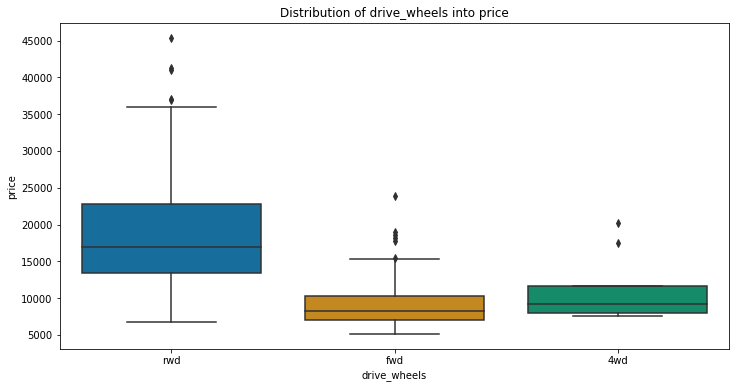

In [30]:
# Plotting Distribution of drive_wheels into price
plt.figure(figsize=(12,6))
sns.boxplot(x='drive_wheels',y='price',data=cars, 
                 palette="colorblind")
plt.title('Distribution of drive_wheels into price');

Cars with fwd and 4wd drive wheels tends to be more sheep and rwd cars more expensive

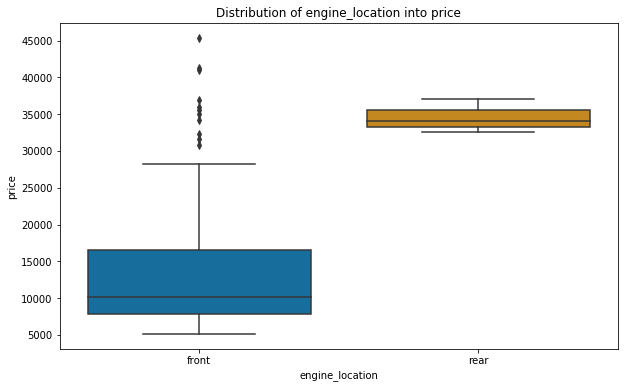

In [31]:
# Plotting Distribution of engine_location into price
plt.figure(figsize=(10,6))
sns.boxplot(x='engine_location',y='price',data=cars, 
                 palette="colorblind")
plt.title('Distribution of engine_location into price');

All cars with the engine located into rear have high prices

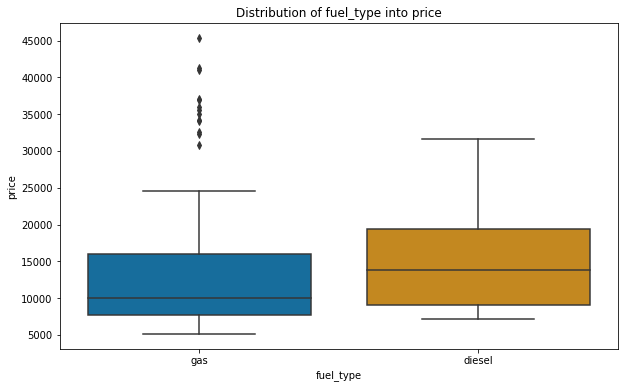

In [32]:
# Plotting Distribution of fuel_type into price
plt.figure(figsize=(10,6))
sns.boxplot(x='fuel_type',y='price',data=cars, 
                 palette="colorblind")
plt.title('Distribution of fuel_type into price');

Cars with diesel have high prices but exist some outlayers cars with gas that have a high price and we can work with that in feature engineering

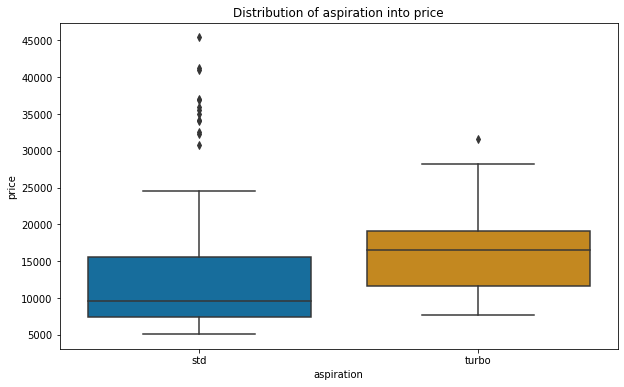

In [33]:
# Plotting Distribution of aspiration into price
plt.figure(figsize=(10,6))
sns.boxplot(x='aspiration',y='price',data=cars, 
                 palette="colorblind")
plt.title('Distribution of aspiration into price');

Cars with turbo tends to have more high prices but exist outlayers with std with high prices too

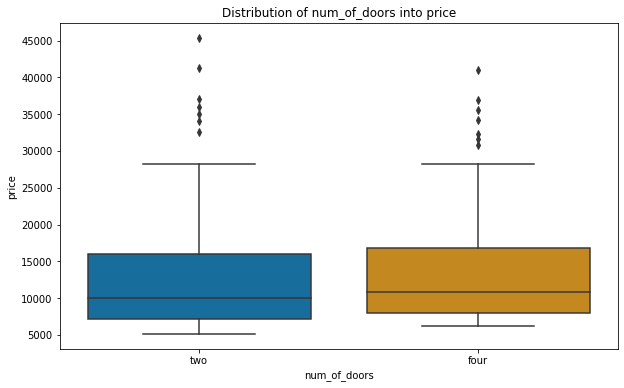

In [34]:
# Plotting Distribution of num_of_doors into price
plt.figure(figsize=(10,6))
sns.boxplot(x='num_of_doors',y='price',data=cars, 
                 palette="colorblind")
plt.title('Distribution of num_of_doors into price');

We have high prices cars with two and four doors, represented into boxplot as outlayers

### Feature Engineering

###### Dealing with outlayers in numeric features

We can create a boxplot for each numerical feature to visualize outlayers and use this boxplots to remove then using Boxplot Interquartile Range(IQR) method.

###### But what is IQR?

IQR is simple the diference between Q3(25th percentile) and Q1(75th percentile), values above (Q3+1.5 * IQR) and values below (Q1-1.5 * IQR) are considered outlayers, in a boxplot we can find all this values and use then to remove outlayers from our data.

<img src='https://i.imgur.com/btxdIWH.png' style='width:1000px;height:550px'/>

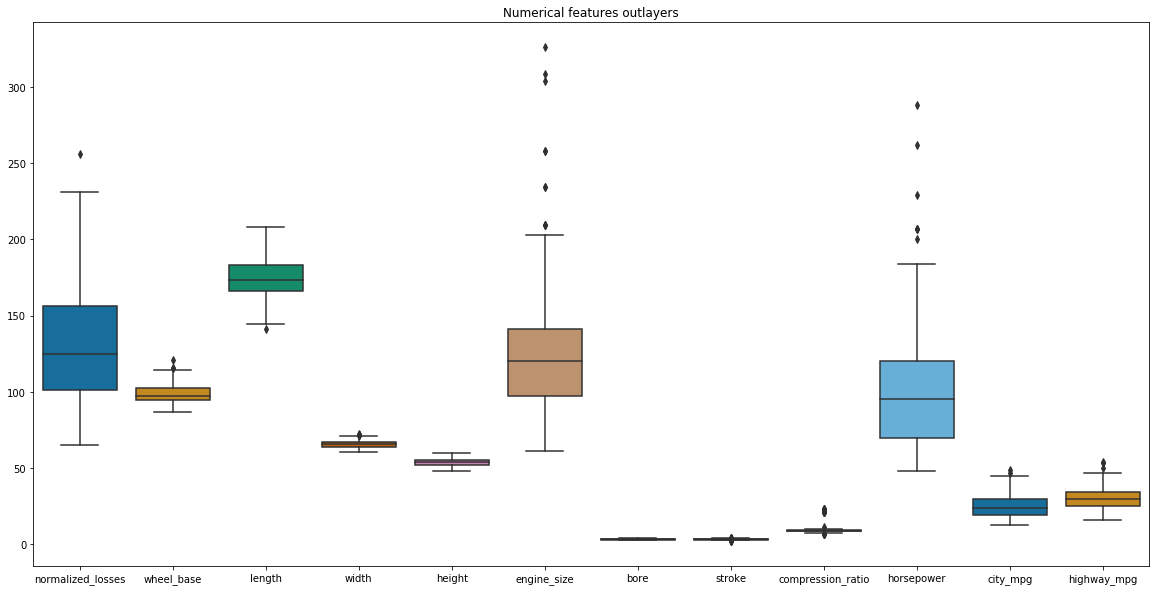

In [35]:
# Plotting boxplots to numeric features
num_var = ['normalized_losses','wheel_base','length'
          ,'width','height','engine_size','bore'
           ,'stroke','compression_ratio','horsepower'
           ,'city_mpg','highway_mpg']

plt.figure(figsize=(20,10))
sns.boxplot(data=cars[num_var], 
                 palette="colorblind")
plt.title('Numerical features outlayers');

As we can see many or our numerical features have outlayers, let's remove then

In [36]:
# creating a for to replace outlayers using boxplot method
for i in num_var:
    # taking quantiles
    Q1 = cars[i].quantile(0.25)
    Q3 = cars[i].quantile(0.75)
    IQR = Q3 - Q1 # calculating IQR
    cars[i] = np.where(cars[i]>(Q3+1.5*IQR),(Q3+1.5*IQR),cars[i]) # removing outlayers
    cars[i] = np.where(cars[i]<(Q1-1.5*IQR),(Q1-1.5*IQR),cars[i]) # removing outlayers

Now let's verifying if outlayers was removed

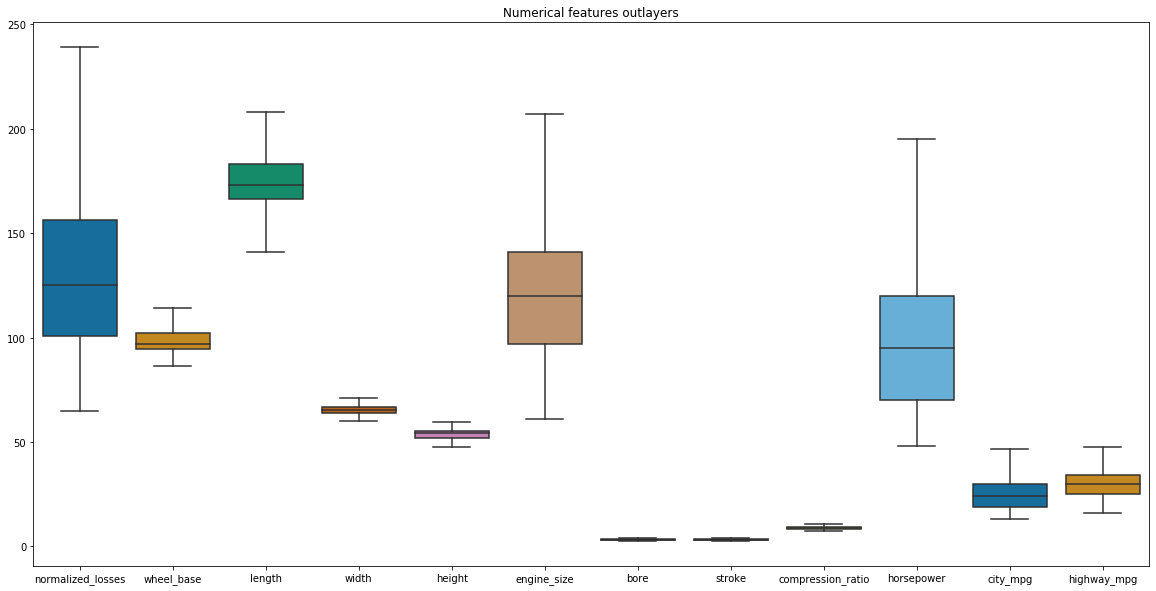

In [37]:
# Plotting boxplots to numeric features
num_var = ['normalized_losses','wheel_base','length'
          ,'width','height','engine_size','bore'
           ,'stroke','compression_ratio','horsepower'
           ,'city_mpg','highway_mpg']

plt.figure(figsize=(20,10))
sns.boxplot(data=cars[num_var], 
                 palette="colorblind")
plt.title('Numerical features outlayers');

Dealing with outlayers in our target

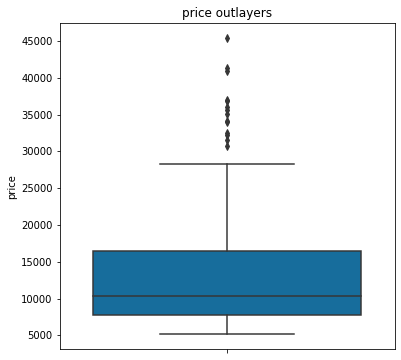

In [38]:
# Plotting a boxplot of our target to visualize outlayers
plt.figure(figsize=(6,6))
sns.boxplot(y='price',data=cars, 
                 palette="colorblind")
plt.title('price outlayers');

Here we can see that cars prices above 30000 are outlayers, let's remove then

In [39]:
# Replace outlayers using boxplot method
Q1 = cars['price'].quantile(0.25) # taking Q1
Q3 = cars['price'].quantile(0.75) # taking Q3
IQR = Q3 - Q1 # calculating IQR
cars['price'] = np.where(cars['price']>(Q3+1.5*IQR),(Q3+1.5*IQR),cars['price']) # removing outlayers
cars['price'] = np.where(cars['price']<(Q1-1.5*IQR),(Q1-1.5*IQR),cars['price']) # removing outlayers

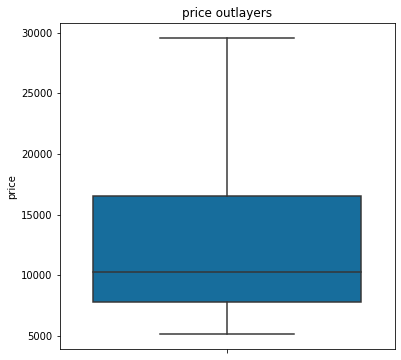

In [40]:
# Visualizing if outlayers was removed
plt.figure(figsize=(6,6))
sns.boxplot(y='price',data=cars, 
                 palette="colorblind")
plt.title('price outlayers');

Now its perfect, let's normalize our numerical features using log transformation

###### Normalizing our numerical features wigh Log-transformation

First of all let's treat our target 'price'

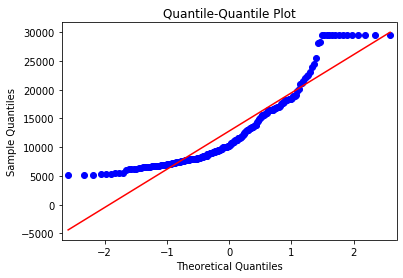

In [41]:
# Quantile-Quantile Plot to virify normal distributions
qqplot(cars['price'], line='s')
plt.title('Quantile-Quantile Plot')
plt.show()

Clearly we have not a normal distribution in our target, let's use the numpy fuction log1p which  applies log(1+x) to all elements of the column to handdle with that

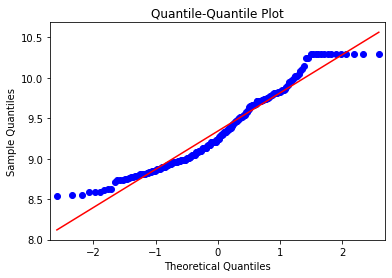

In [42]:
# Log-transformation of the target variable
cars['price'] = np.log1p(cars['price'])

# Quantile-Quantile Plot to virify normal distributions
qqplot(cars['price'], line='s')
plt.title('Quantile-Quantile Plot')
plt.show()

Not perfect, but much better, now we have values above 10 and below 9 more close to the central line, let's treat another features with the same tecnics

num_of_cylinders are represented as categorys but it's a continuos feature, let's convert

In [43]:
# Converting num_of_cylinders into a continuos variable
cars['num_of_cylinders'][cars['num_of_cylinders']=='two'] = 2
cars['num_of_cylinders'][cars['num_of_cylinders']=='three'] = 3
cars['num_of_cylinders'][cars['num_of_cylinders']=='four'] = 4
cars['num_of_cylinders'][cars['num_of_cylinders']=='five'] = 5
cars['num_of_cylinders'][cars['num_of_cylinders']=='six'] = 6
cars['num_of_cylinders'][cars['num_of_cylinders']=='eight'] = 8
cars['num_of_cylinders'][cars['num_of_cylinders']=='twelve'] = 12

# converting into integer
cars['num_of_cylinders'] = cars['num_of_cylinders'].astype('int64')

Now let's see this feature relation with prices

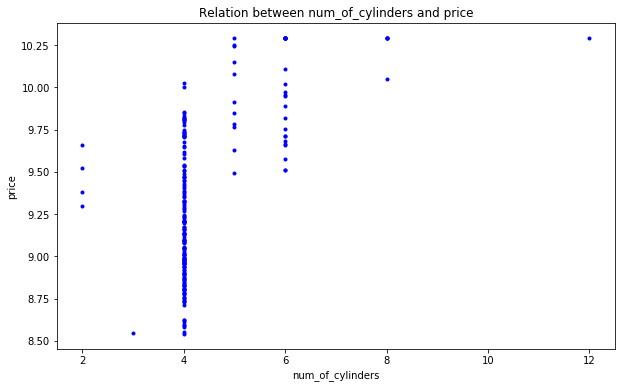

In [44]:
# Plotting a scatter plot of relation between num_of_cylinders and price
plt.figure(figsize=(10,6)) # creating the figure
plt.plot(cars['num_of_cylinders'] # plotting
         ,cars['price'],'.'
        ,color='blue')

plt.xlabel('num_of_cylinders')
plt.ylabel('price')
plt.title('Relation between num_of_cylinders and price');

As we already see above in boxplots, cars with more cylinders aparently tends to be more expensive

Now let's use log trasformation to solve some problemas with features that are not normal distributed

In [45]:
# taking numerical features to log trasformation
num_var = ['normalized_losses','wheel_base','length'
          ,'width','height','curb_weight','engine_size','bore'
           ,'stroke','compression_ratio','horsepower','peak_rpm'
           ,'city_mpg','highway_mpg','num_of_cylinders']

cars[num_var] = np.log1p(cars[num_var]) # log transformation

Let's visualize the new numerical distributions

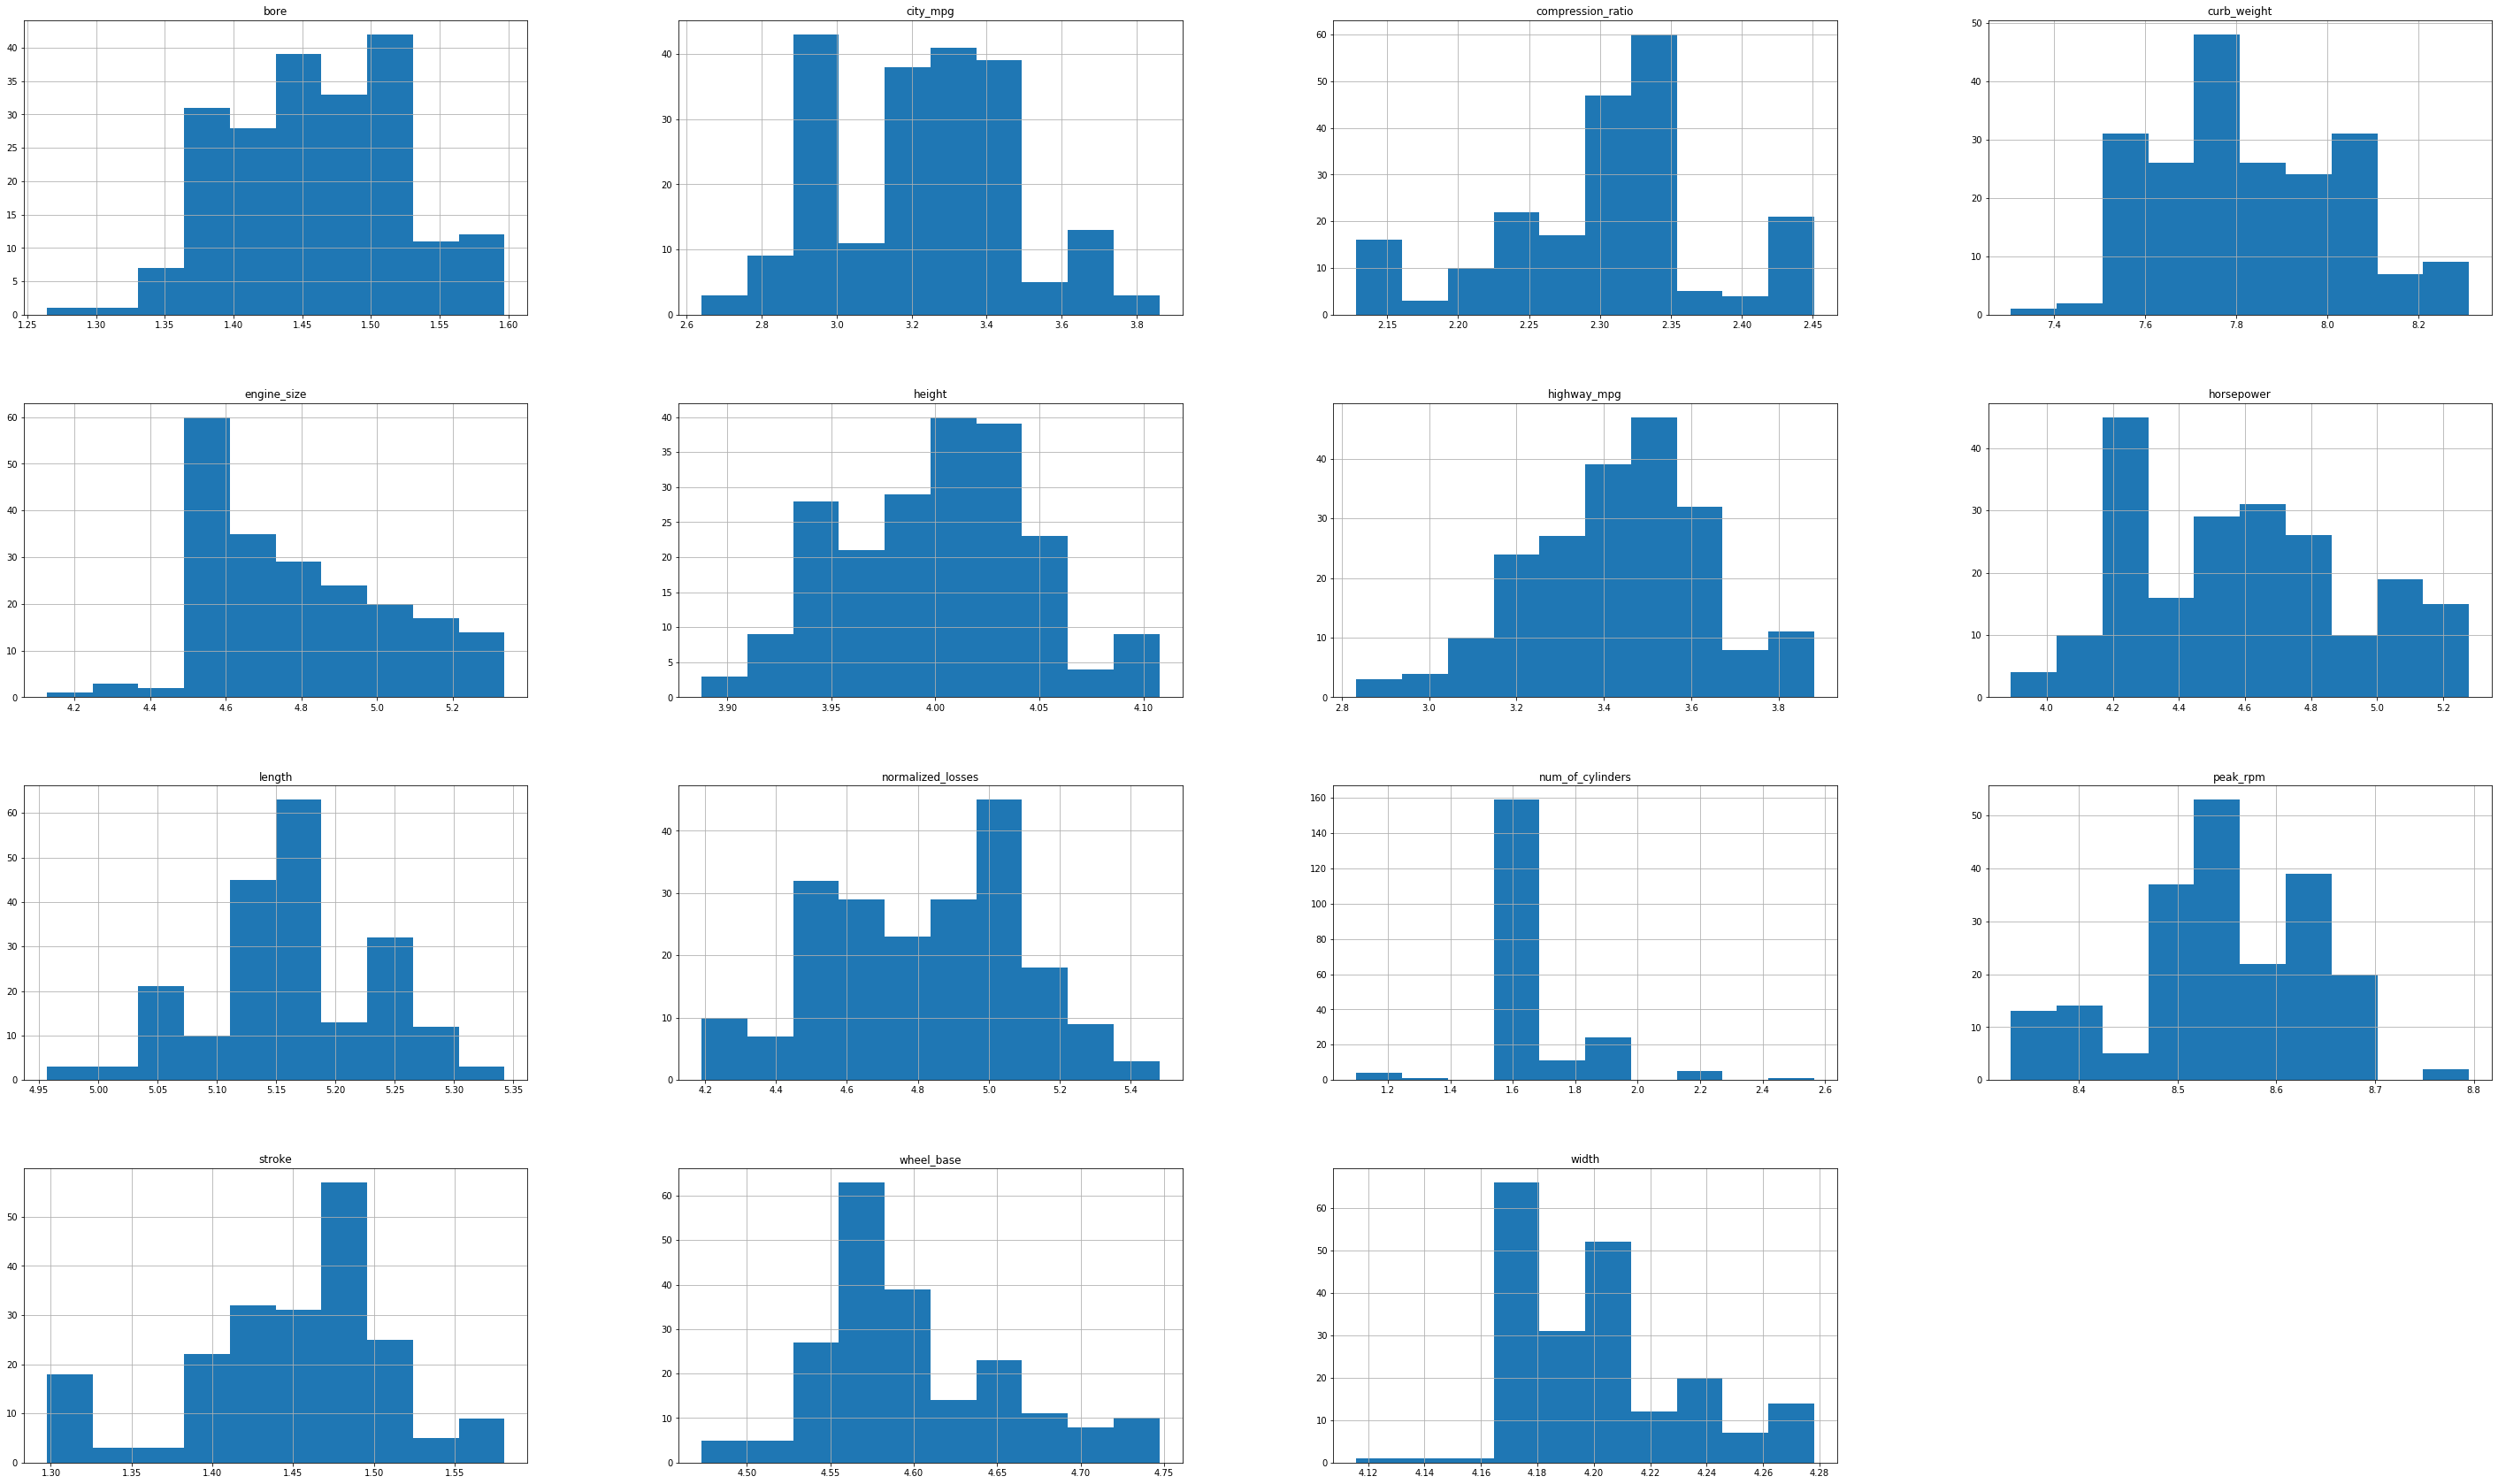

In [46]:
# plotting a histogram for each feature
cars[num_var].hist(bins=10
                   , figsize=(50,30)
                   , layout=(4,4));

Now with the first outlayers removed, target treated and our first continuos features normalized let's create new features, treat outlayers, do log transformation and do a correlation analysis to remove high correlated features

###### Creating new features

First of all let's try to remove some of high correlations creating new features with relation between high correlated features

In [47]:
# relation between length and width
cars['len_wid'] = cars['length']/cars['width']

# relation between wheel_base and curb_weight
cars['whb_c_wght'] = cars['wheel_base']/cars['curb_weight']

# relation between horsepower and engine_size
cars['hpw_eng_size'] = cars['horsepower']/cars['engine_size']

# relation between highway_mpg and city_mpg
cars['hway_cit_mpg'] = cars['highway_mpg']/cars['city_mpg']

Let's see distributions of this new features

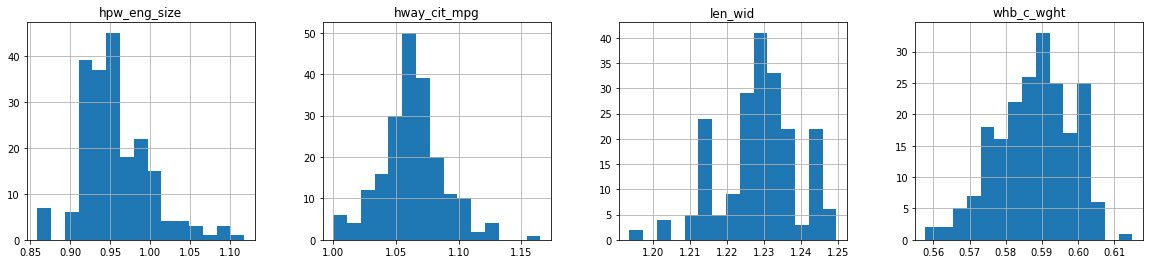

In [48]:
# Saving new features
new_feat1 = ['len_wid','whb_c_wght','hpw_eng_size','hway_cit_mpg']

# plotting a histogram for each feature
cars[new_feat1].hist(bins=15
                   , figsize=(20,4)
                   , layout=(1,4));

Now let's create some features that have a create relation with each other, like mpg and horsepower

In [49]:
# creating a feature to represent the mean mpg
cars['mean_mpg'] = (cars['highway_mpg']+cars['city_mpg'])/2

# creating a feature to represent the horsepower per cylinders
cars['hpw_cylinders'] = cars['horsepower']/cars['num_of_cylinders']

# creating a feature to represent the mean mpg per horsepower
cars['mean_mpg_hpw'] = cars['mean_mpg']/cars['horsepower']

Seeing new features distributions

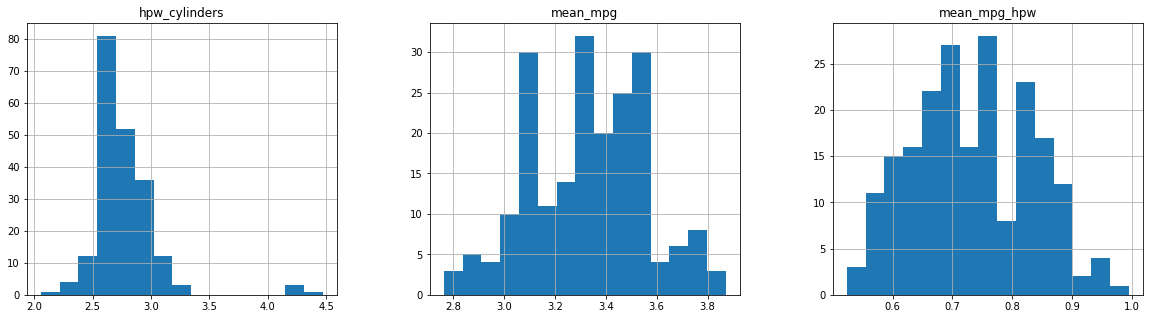

In [50]:
# Saving new features
new_feat2 = ['mean_mpg','hpw_cylinders','mean_mpg_hpw']

# plotting a histogram for each feature
cars[new_feat2].hist(bins=15
                   , figsize=(20,5)
                   , layout=(1,3));

Now let's convert some binary categorical features into continuos using boxplot distribution related to car prices

In [51]:
# Converting engine_location into binary
cars['engine_location'] = np.where(cars['engine_location']=='front',2,1)

# Converting fuel_type into binary
cars['fuel_type'] = np.where(cars['fuel_type']=='gas',2,1)

# Converting aspiration into binary
cars['aspiration'] = np.where(cars['aspiration']=='std',2,1)

# Converting num_of_doors into binary
cars['num_of_doors'] = np.where(cars['num_of_doors']=='two',2,1)

Here I use boxplots of categorical features in Exploratory analysis step to convert categorical features into continuos features using boxplot distribution, i use range of prices that this categorys was distributed to give then a level of importance, lower levels of importance means that this category can predict low prices more accurattly and high levels of importance means that this category can predict high prices more accurattly, the importance levels was distributed like as 1,2,3,4,5...

In [52]:
# converting maker to continuos based on boxplots
cars['maker'][cars['maker']=='chevrolet'] = 1
cars['maker'][cars['maker']=='renault'] = 2
cars['maker'][cars['maker']=='isuzu'] = 3
cars['maker'][cars['maker']=='subaru'] = 4
cars['maker'][cars['maker']=='plymouth'] = 5
cars['maker'][cars['maker']=='dodge'] = 6
cars['maker'][cars['maker']=='honda'] = 7
cars['maker'][cars['maker']=='volkswagen'] = 8
cars['maker'][cars['maker']=='mitsubishi'] = 9
cars['maker'][cars['maker']=='alfa-romero'] = 10
cars['maker'][cars['maker']=='mercury'] = 11
cars['maker'][cars['maker']=='toyota'] = 12
cars['maker'][cars['maker']=='peugot'] = 13
cars['maker'][cars['maker']=='mazda'] = 14
cars['maker'][cars['maker']=='saab'] = 15
cars['maker'][cars['maker']=='nissan'] = 16
cars['maker'][cars['maker']=='volvo'] = 17
cars['maker'][cars['maker']=='audi'] = 18
cars['maker'][cars['maker']=='jaguar'] = 19
cars['maker'][cars['maker']=='porsche'] = 20
cars['maker'][cars['maker']=='bmw'] = 21
cars['maker'][cars['maker']=='mercedes-benz'] = 22
cars['maker']=cars['maker'].astype('int64')

# converting fuel_system to continuos based on boxplots
cars['fuel_system'][cars['fuel_system']=='1bbl'] = 1
cars['fuel_system'][cars['fuel_system']=='spfi'] = 2
cars['fuel_system'][cars['fuel_system']=='2bbl'] = 3
cars['fuel_system'][cars['fuel_system']=='mfi'] = 4
cars['fuel_system'][cars['fuel_system']=='4bbl'] = 5
cars['fuel_system'][cars['fuel_system']=='spdi'] = 6
cars['fuel_system'][cars['fuel_system']=='idi'] = 7
cars['fuel_system'][cars['fuel_system']=='mpfi'] = 8
cars['fuel_system']=cars['fuel_system'].astype('int64')

# converting engine_type to continuos based on boxplots
cars['engine_type'][cars['engine_type']=='rotor'] = 1
cars['engine_type'][cars['engine_type']=='l'] = 2
cars['engine_type'][cars['engine_type']=='dohcv'] = 3
cars['engine_type'][cars['engine_type']=='dohc'] = 4
cars['engine_type'][cars['engine_type']=='ohcf'] = 5
cars['engine_type'][cars['engine_type']=='ohc'] = 6
cars['engine_type'][cars['engine_type']=='ohcv'] = 7
cars['engine_type']=cars['engine_type'].astype('int64')

# converting body_style to continuos based on boxplots
cars['body_style'][cars['body_style']=='hatchback'] = 1
cars['body_style'][cars['body_style']=='wagon'] = 2
cars['body_style'][cars['body_style']=='convertible'] = 4
cars['body_style'][cars['body_style']=='sedan'] = 3
cars['body_style'][cars['body_style']=='hardtop'] = 5
cars['body_style']=cars['body_style'].astype('int64')

# converting drive_wheels to continuos based on boxplots
cars['drive_wheels'][cars['drive_wheels']=='4wd'] = 1
cars['drive_wheels'][cars['drive_wheels']=='fwd'] = 2
cars['drive_wheels'][cars['drive_wheels']=='rwd'] = 3
cars['drive_wheels']=cars['drive_wheels'].astype('int64')

Let's see the relation between each new continuos feature with our target

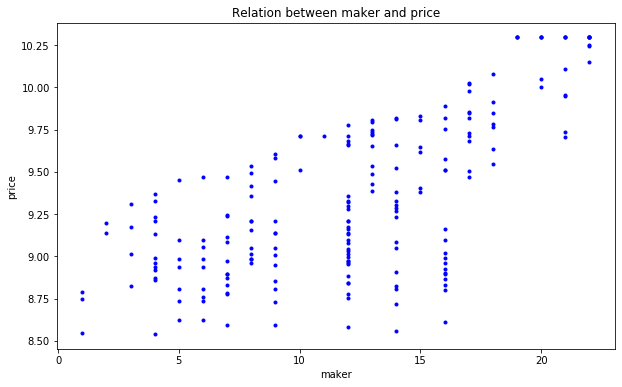

In [53]:
# Plotting a scatter plot of relation between width and price
plt.figure(figsize=(10,6)) # creating the figure
plt.plot(cars['maker'] # plotting
         ,cars['price'],'.'
        ,color='blue')

plt.xlabel('maker')
plt.ylabel('price')
plt.title('Relation between maker and price');

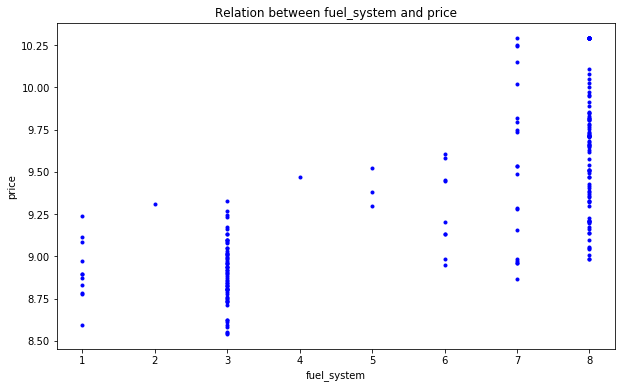

In [54]:
# Plotting a scatter plot of relation between width and price
plt.figure(figsize=(10,6)) # creating the figure
plt.plot(cars['fuel_system'] # plotting
         ,cars['price'],'.'
        ,color='blue')

plt.xlabel('fuel_system')
plt.ylabel('price')
plt.title('Relation between fuel_system and price');

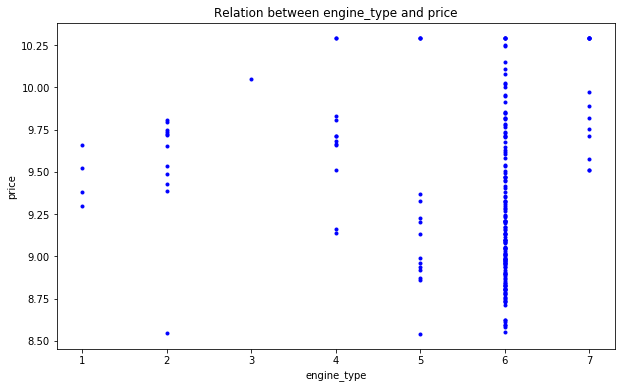

In [55]:
# Plotting a scatter plot of relation between width and price
plt.figure(figsize=(10,6)) # creating the figure
plt.plot(cars['engine_type'] # plotting
         ,cars['price'],'.'
        ,color='blue')

plt.xlabel('engine_type')
plt.ylabel('price')
plt.title('Relation between engine_type and price');

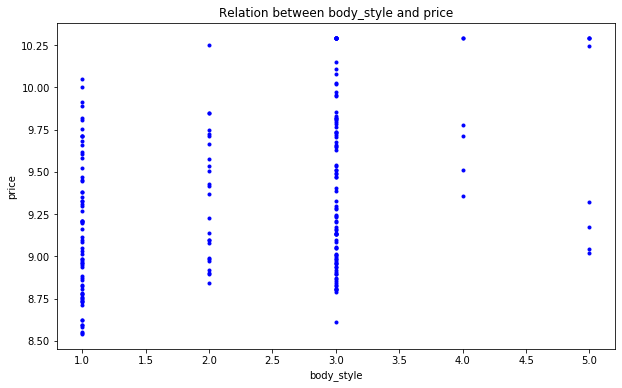

In [56]:
# Plotting a scatter plot of relation between width and price
plt.figure(figsize=(10,6)) # creating the figure
plt.plot(cars['body_style'] # plotting
         ,cars['price'],'.'
        ,color='blue')

plt.xlabel('body_style')
plt.ylabel('price')
plt.title('Relation between body_style and price');

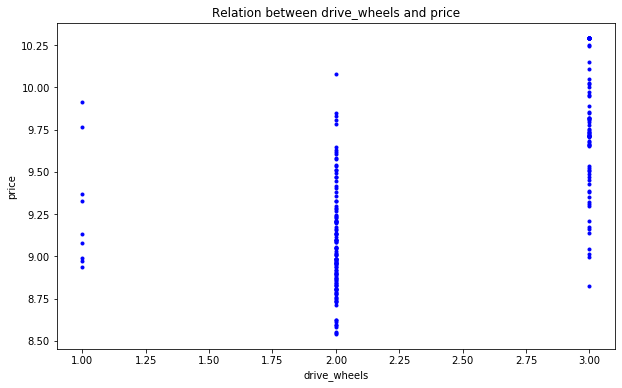

In [57]:
# Plotting a scatter plot of relation between width and price
plt.figure(figsize=(10,6)) # creating the figure
plt.plot(cars['drive_wheels'] # plotting
         ,cars['price'],'.'
        ,color='blue')

plt.xlabel('drive_wheels')
plt.ylabel('price')
plt.title('Relation between drive_wheels and price');

Maker and fuel_system seens to have a good 'linear' relation with our target, latter let's do a correlation analysis to verify this

###### Dealing with outlayers in new features

Here we need to be sure that new features will have not outlayers, let's do a boxplot for each feature to see this

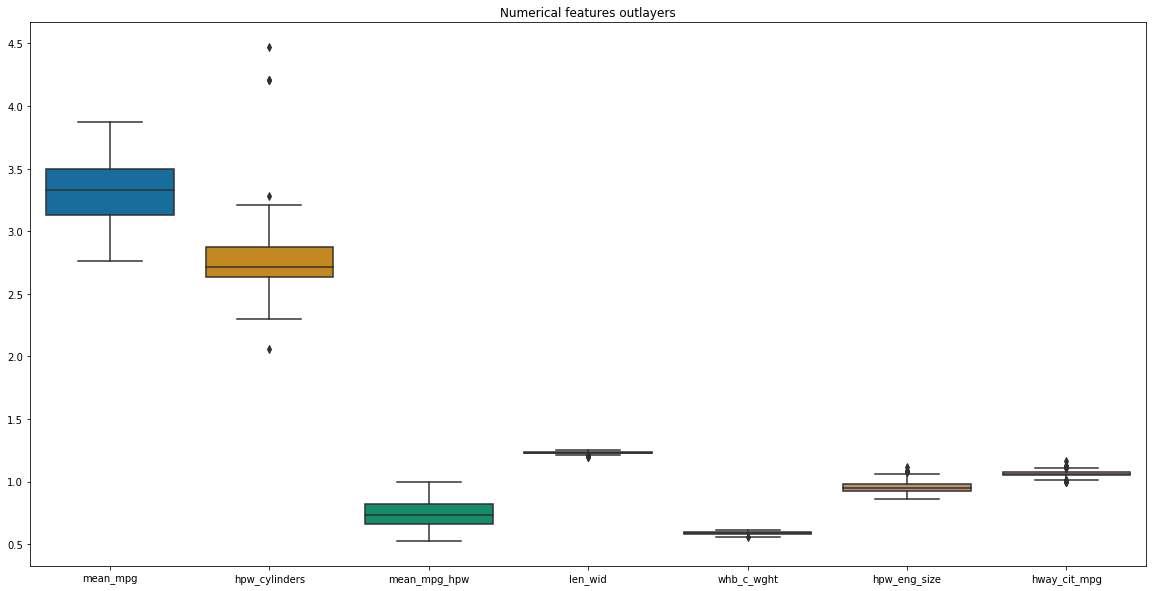

In [58]:
# Plotting boxplots to numeric features
num_var = ['mean_mpg','hpw_cylinders','mean_mpg_hpw'
           ,'len_wid','whb_c_wght','hpw_eng_size','hway_cit_mpg']

plt.figure(figsize=(20,10))
sns.boxplot(data=cars[num_var], 
                 palette="colorblind")
plt.title('Numerical features outlayers');

Perfect, was we can see hpw_cylinders and another features have outlayes, let's remove then using IQR boxplot method

In [59]:
# creating a for to replace outlayers using boxplot method
for i in num_var:
    Q1 = cars[i].quantile(0.25)
    Q3 = cars[i].quantile(0.75)
    IQR = Q3 - Q1
    cars[i] = np.where(cars[i]>(Q3+1.5*IQR),(Q3+1.5*IQR),cars[i])
    cars[i] = np.where(cars[i]<(Q1-1.5*IQR),(Q1-1.5*IQR),cars[i])

Verifying if outlayers was replaced

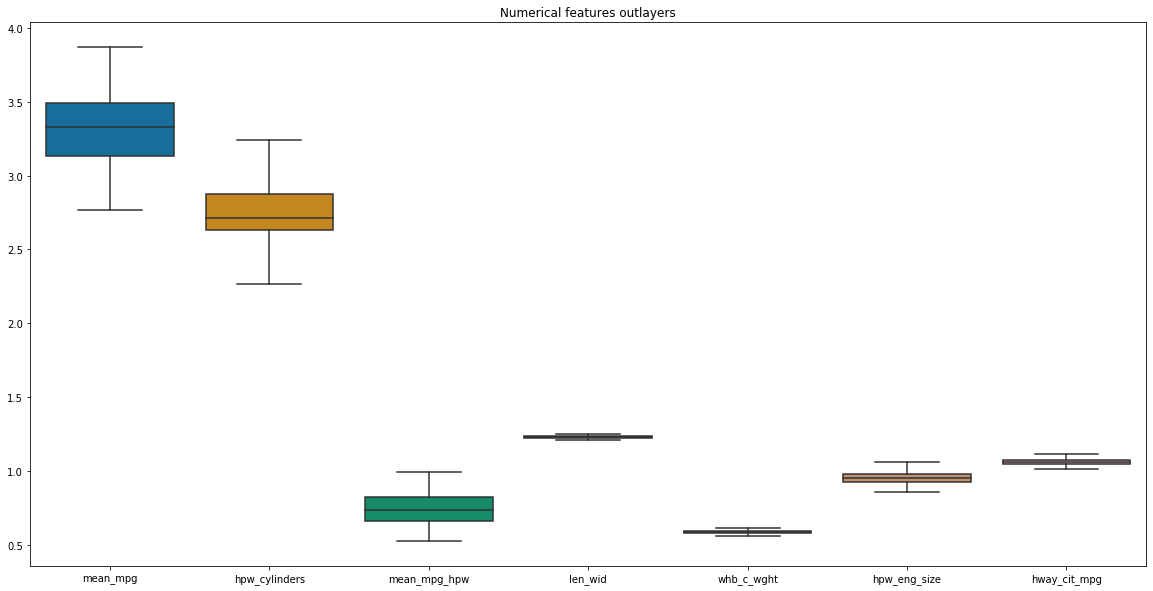

In [60]:
# Plotting boxplots to numeric features
num_var = ['mean_mpg','hpw_cylinders','mean_mpg_hpw'
           ,'len_wid','whb_c_wght','hpw_eng_size','hway_cit_mpg']

plt.figure(figsize=(20,10))
sns.boxplot(data=cars[num_var], 
                 palette="colorblind")
plt.title('Numerical features outlayers');

Perfect! Now let's do a log transformation with the new features

###### Normalizing new features wigh log transformation

In [61]:
# taking numerical features to log trasformation
num_var = ['mean_mpg','hpw_cylinders','mean_mpg_hpw'
           ,'len_wid','whb_c_wght','hpw_eng_size','hway_cit_mpg'
          ,'maker','drive_wheels','body_style','engine_type','fuel_system'
          ,'engine_location','fuel_type','aspiration','num_of_doors']

cars[num_var] = np.log1p(cars[num_var]) # log transformation

###### Removing high correlated features

Now let's do a correlation analysis again to remove high correlated features

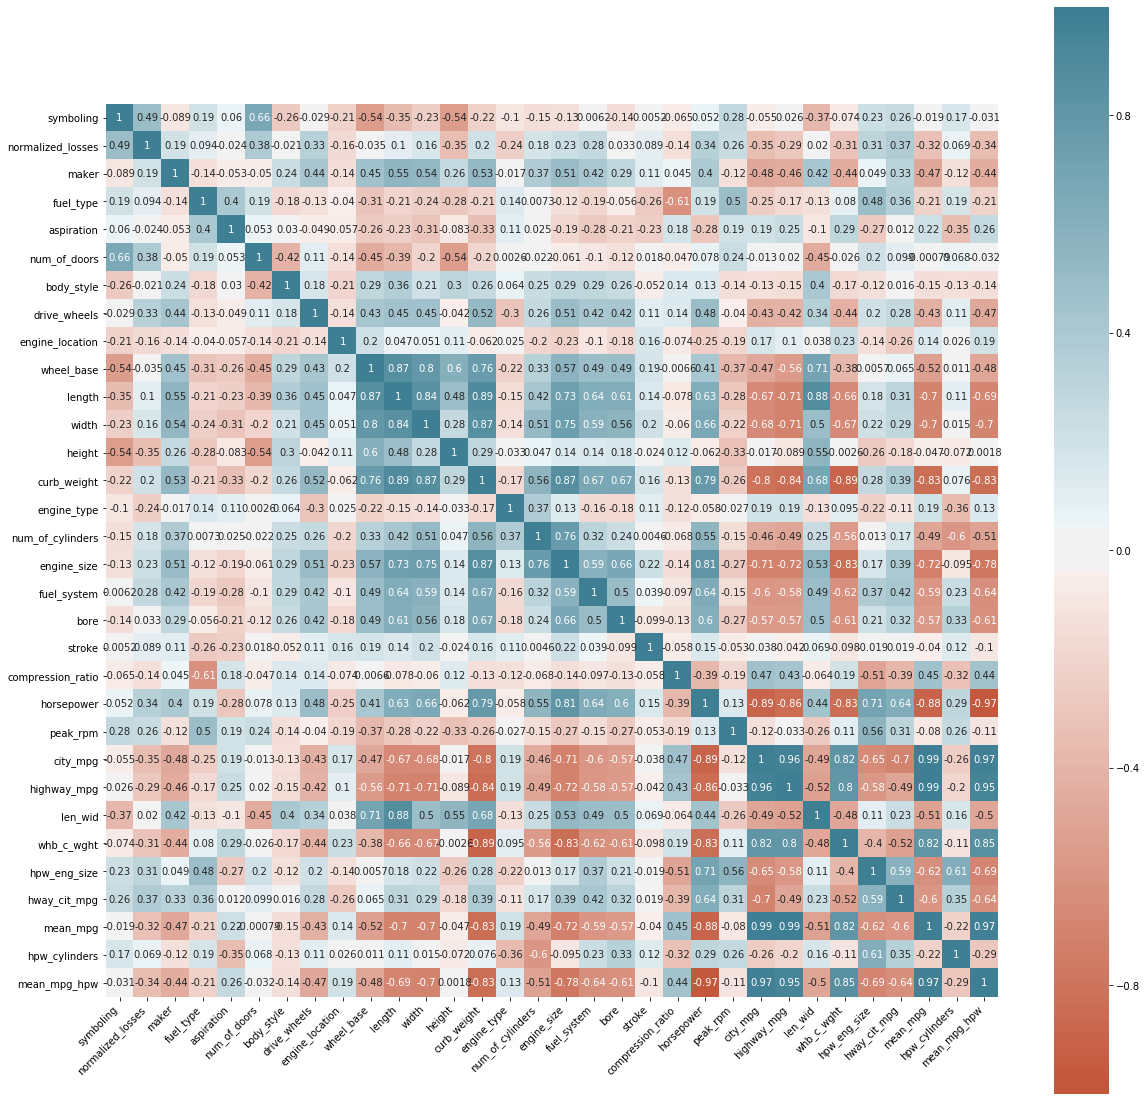

In [62]:
# Numerical variables correlation
cars_noprice = cars.drop('price',axis=1) # removing price column

corr = cars_noprice.corr() # creting the correlation matrix

plt.figure(figsize=(20,20)) # creating the and difyning figure size
ax = sns.heatmap( # plotting correlation matrix
    corr,vmin=-1, vmax=1, center=0,
    annot = True,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels( # adding axes values
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

We clearly have some features that are highly correlated with each other, now we have a great number of features, let's select and remove then using a high correlation matrix

In [63]:
# creating the correlation matrix
corr_matrix = cars_noprice.corr().abs()

# creating a mask to apply to our correlation matrix and filter high correlations
mask = np.triu(np.ones_like(corr_matrix,dtype=bool))

# replacing low correlations with NA's
tri_df = corr_matrix.mask(mask)

# selecting features to dropp that have correlation with each other above 0.80
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.8)]

# dropping high correlated features
cars = cars.drop(to_drop,axis=1)

Now let's see how this our new correlation matrix but first let's but our target 'price' in the last column

In [64]:
price = cars['price'] #saving prices
cars = cars.drop('price',axis=1) # dropping prices from cars dataset
cars['price'] = price # joing prices into our dataset again

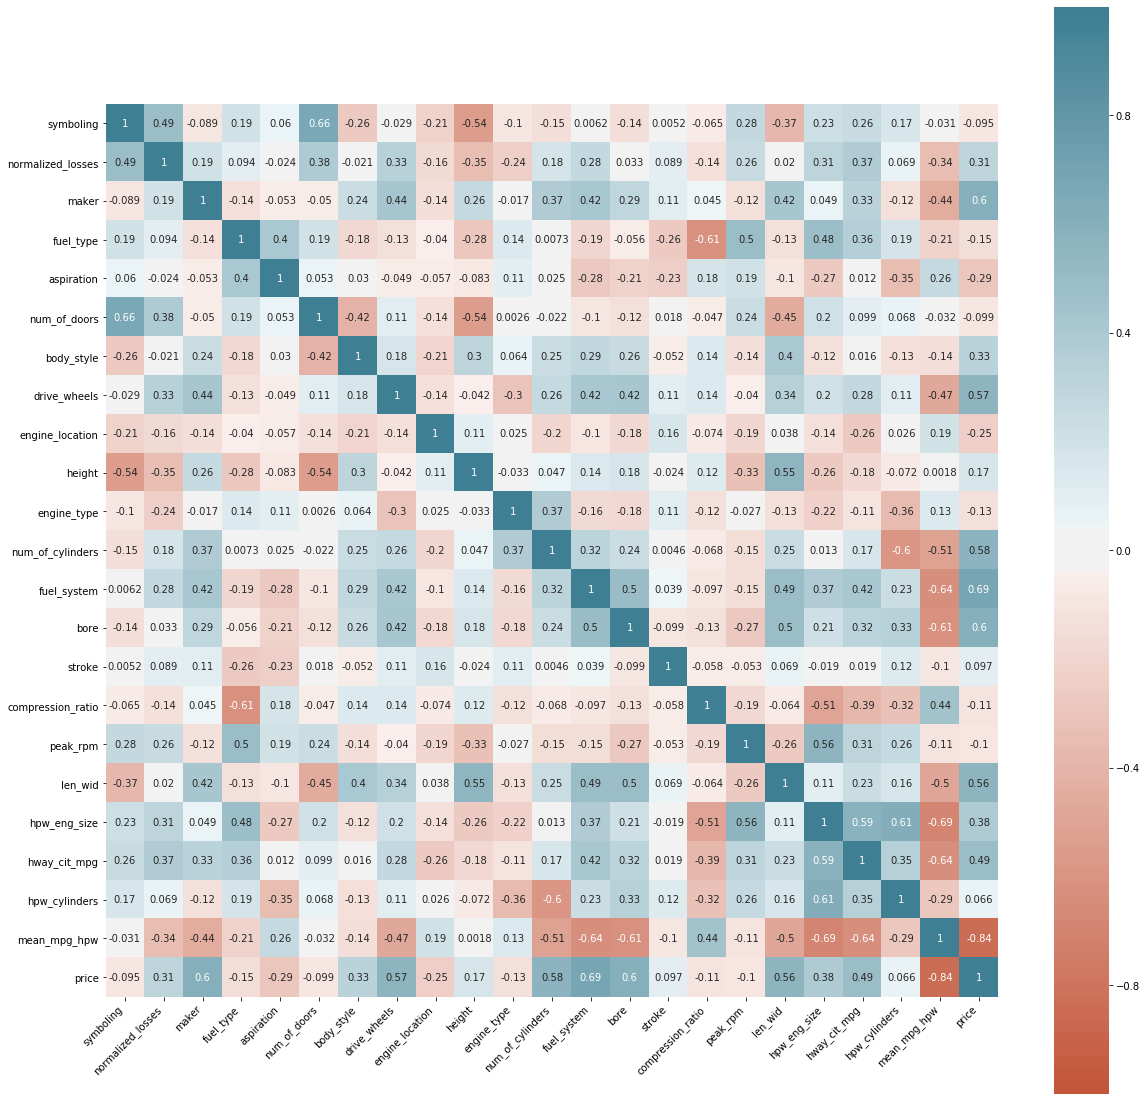

In [65]:
# Numerical variables correlation
corr = cars.corr() # creting the correlation matrix

plt.figure(figsize=(20,20)) # creating the and difyning figure size
ax = sns.heatmap( # plotting correlation matrix
    corr,vmin=-1, vmax=1, center=0,
    annot = True,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels( # adding axes values
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Now that we have removed high correlated features we have less features to process and we this we also can remove chances of overfitting

Now let's put our target in the last column and go to modeling

In [66]:
price = cars['price'] #saving prices
cars = cars.drop('price',axis=1) # dropping prices from cars dataset
cars['price'] = price # joing prices into our dataset again

### Modeling

First of all let's **split our dataset into train and test**, we need to do this do avoid overfitting in our model and evaluate our model performance, to do this we need to separaty and target from rest of features

In [67]:
# splitting the data with our target into y1 and the rest of data into x1
x1 = cars.drop('price', axis=1)
y1 = cars['price']

In [68]:
# splitting our dataset into train and target
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.7,random_state=42) # 70% train and 30% test

###### Model Selection

As we can see in our exploratory analysis many of our features have a linear relation with our target.
Thinking in that, let's create our first model using **Linear Regression**.

###### But how linear regression works?

Linear regression consists of finding the best-fitting straight line through the points. The best-fitting line is called a regression line. The blue lineis  the regression line and consists of the predicted score on weight for each height. The vertical lines from the points to the regression line represent the errors of prediction. As you can see, the black points is very near the regression line; its error of prediction is small.

With a linear regression model we can use this regression line that is given by y= a + b * x to make predictions of new weights based on already knew height values.

In this case we have a simple linear regression, in our model i'll use a multiple linear regression(that have more then 1 variable in x axes) to predict car prices.

<img src='https://i.imgur.com/PKSoO8R.png' style='width:600px;height:350px'/>

In [69]:
# training the model
regression = LinearRegression()
regression.fit(x_train1, y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now let's predict car prices in train dataset and latter in test dataset to verify model stabilitty

In [70]:
# predicting on train dataset
y_pred_train1 = regression.predict(x_train1)
y_pred_train1 = np.exp(y_pred_train1)

In [71]:
# predicting on test dataset
y_pred_test1 = regression.predict(x_test1)
y_pred_test1 = np.exp(y_pred_test1)

In [72]:
# removing log transformation from our target
y_train1_exped = np.exp(y_train1)
y_test1_exped = np.exp(y_test1)

Now, to evaluate our model we need to use to matrics: Mean Absolute Error(MAE) and Root Mean Squared Error(RMSE), let's see this metrics in train and test dataset predictions

In [73]:
# model quality metrics in train dataset prediction
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train1_exped, y_pred_train1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train1_exped, y_pred_train1)))

Mean Absolute Error: 1485.341842351654
Root Mean Squared Error: 2034.018252093814


Apparently a great result with MAE and RMSE, now let's see if our model was capable of generalize in test dataset

In [74]:
# model quality metrics in test dataset prediction
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1_exped, y_pred_test1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1_exped, y_pred_test1)))

Mean Absolute Error: 1918.0731418839043
Root Mean Squared Error: 2590.0534618031857


Not a great diference from train to test predictions, to be sure that our model are good let's look at the Mae Ratio

###### Evaluating our model with Mae Ratio metrics

Mae Ratio is take the MAE percentage in relation to mean price of our test dataset, this metrics it's called MAE RATIO, with this metric we can measure how far our predictions was from the mean of our target, the lower our MAE RATIO is, better our model is, the best scenario it's a model with a MAE RATIO with less then 10.

In [75]:
print("The mean price of our test dataset is: ")
print(y_test1_exped.mean()) # calculating the mean of our car prices
print()
print("The MAE percentage in relation to mean price of our test dataset is: ")
print(round(metrics.mean_absolute_error(y_test1_exped, y_pred_test1)/y_test1_exped.mean()*100,2)) # calculating mae ratio

The mean price of our test dataset is: 
12335.802083333332

The MAE percentage in relation to mean price of our test dataset is: 
15.55


### Conclusion

To answer our question in this notebook title, let's take a look into scatter plot below, most of our cars in our dataset cost between 5000 and 2000 dollars, only a feel cost between 20000 and 30000 dollars, our model seems to be more accuraty to predict prices of sheep cars, as we can see cars with values above 20000 are more scattered in our plot.

After cleaning, explore and modelling our data we are finelly here, the conclusion! The model has a Mae Ratio of 15.55, not perfect but a good model, with a medium error and can be used to evaluate cars with a good accuracy, our target have not a good distribution and even after outlayers removal and log transformation still not good enough,certainly we can archieve a better results working more on feature engineering to create feature with more prediction power. Lastly we can also test another regression models like gradient boosting and try to improve results without overfitting.

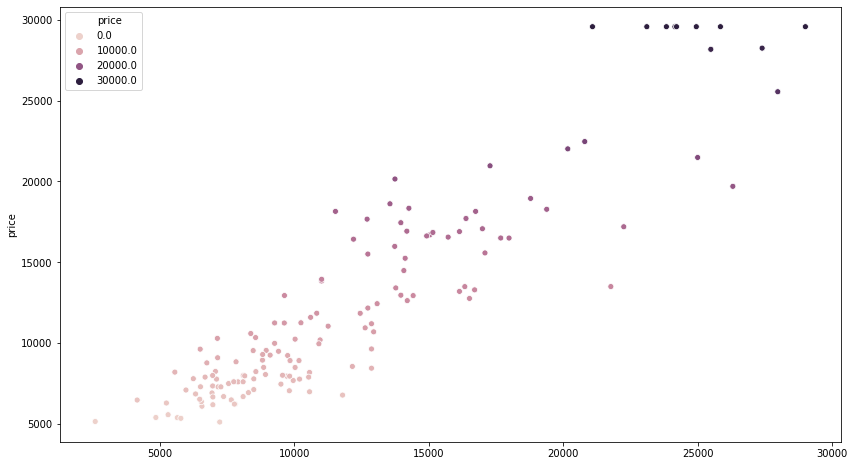

In [76]:
# draw the figure to recieve a plot
plt.figure(figsize=(14,8))

# creating a scatter plot with seaborn
sns.scatterplot(x=y_pred_test1, y=y_test1_exped,hue=y_test1_exped);